<a href="https://colab.research.google.com/github/YMuskrat/SIS-model-For-infectious-diseases/blob/master/Simulation_using_gillespie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulation**

In [ ]:
# 28 November 2021 v1.3
# Luc Berthouze
#Yassir Laaouach
from random import expovariate # Generate variates from exponential distribution
import numpy as np

def gillespie_ABA(N,B0,beta,gamma,Tmax):

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1]         

    return T,A,B    

In [ ]:
# first scenario N is small
# N is small and R<1, B0 varries
x,y,z=gillespie_ABA(10,1,0.5,1,30)

x1,y1,z1=gillespie_ABA(10,5,0.5,1,30)

# N is small and R>1, B0 varries
x2,y2,z2=gillespie_ABA(10,1,2,1,30)

x3,y3,z3=gillespie_ABA(10,5,2,1,30)

#R0=1
x8,y8,z8=gillespie_ABA(10,1,1,1,30)


# second scenario N is big
# N is big and R<1, B0 varries
x4,y4,z4=gillespie_ABA(1000,5,0.5,1,30)

x5,y5,z5=gillespie_ABA(1000,300,0.5,1,30)

# N is big and R>1, B0 varries
x6,y6,z6=gillespie_ABA(1000,5,5,1,30)

x7,y7,z7=gillespie_ABA(1000,300,5,1,30)



# First Sceenario


# Small N while varrying B0 and R0

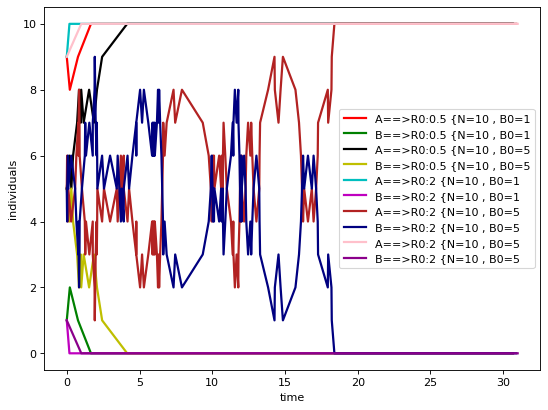

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# R0 small and N and small B0
plt.plot(x,y,'r',linewidth=2,label='A==>R0:0.5 {N=10 , B0=1')
plt.plot(x,z,'g',linewidth=2,label='B==>R0:0.5 {N=10 , B0=1')

# R0 <1 small and big N and big B0
plt.plot(x1,y1,'k',linewidth=2,label='A==>R0:0.5 {N=10 , B0=5')
plt.plot(x1,z1,'y',linewidth=2,label='B==>R0:0.5 {N=10 , B0=5')

# R0>1 small and N and small B0
plt.plot(x2,y2,'c',linewidth=2,label='A==>R0:2 {N=10 , B0=1')
plt.plot(x2,z2,'m',linewidth=2,label='B==>R0:2 {N=10 , B0=1')

# R0 >1 small and big N and big B0
plt.plot(x3,y3,color='firebrick',linewidth=2,label='A==>R0:2 {N=10 , B0=5')
plt.plot(x3,z3,color='navy',linewidth=2,label='B==>R0:2 {N=10 , B0=5')

#R0=1
plt.plot(x8,y8,color='pink',linewidth=2,label='A==>R0:2 {N=10 , B0=5')
plt.plot(x8,z8,color='darkmagenta',linewidth=2,label='B==>R0:2 {N=10 , B0=5')


plt.xlabel('time')
plt.ylabel('individuals')
plt.legend(loc='best')
plt.show()

# Second scenario

# Big N while varrying B0 and R0

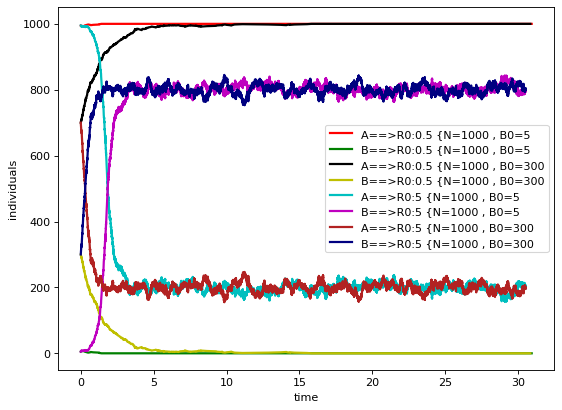

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# R0 small and N and small B0
plt.plot(x4,y4,'r',linewidth=2,label='A==>R0:0.5 {N=1000 , B0=5')
plt.plot(x4,z4,'g',linewidth=2,label='B==>R0:0.5 {N=1000 , B0=5')

# R0 <1 small and big N and big B0
plt.plot(x5,y5,'k',linewidth=2,label='A==>R0:0.5 {N=1000 , B0=300')
plt.plot(x5,z5,'y',linewidth=2,label='B==>R0:0.5 {N=1000 , B0=300')

# R0>1 small and N and small B0
plt.plot(x6,y6,'c',linewidth=2,label='A==>R0:5 {N=1000 , B0=5')
plt.plot(x6,z6,'m',linewidth=2,label='B==>R0:5 {N=1000 , B0=5')

# R0 >1 small and big N and big B0
plt.plot(x7,y7,color='firebrick',linewidth=2,label='A==>R0:5 {N=1000 , B0=300')
plt.plot(x7,z7,color='navy',linewidth=2,label='B==>R0:5 {N=1000 , B0=300')



plt.xlabel('time')
plt.ylabel('individuals')
plt.legend(loc='best')
plt.show()

# **Description**

In this graph we have modeled our model using the gellipse algorithm, the algorithm takes four arguments N, B0, beta, gamma, Tmax and return T, A and B. T is the time transition when one individual from one state to another, A is the number of individuals after the transition, B is the number of individual after one transition.

During this experiment, we want to know how the number of individuals changes in each state as we change the paramters over time.

The parameters involved in this state transition are, R0= Beta/gamma, N, and B0 ( the number of individuals in state B at time t=0).

we can see that that the R0 quantity has an infulence on how our system behaves. we can see that the time and the height of the peak values depends greatly on our R0. Our R0 value tells us if the system or when our system will converge to its orignial states. more specifically, if A will converge to N and B to 0 or 1. We can clearly see, that when our R0>1 the number of our B individuals will decrease over time otherwise if R0 < 1, it will increase over time. 

On the other hand, B0 which should be always bigger than 1 for our system to work, have an impact on the transition, the bigger the B0 the bigger the transition from one state to another. We also note that the number of the individials in total matter, if the number of N is small, our B quickly dies out and converges to 0, while if it is big, it would take more time to die and converge to 0.when we tried for N big, our system behavior didnt die our quickly, especially when our R was bigger than 1

For a sufficient R0, the behavior of our system could go on and sometimes doesnt end quickly nor converge and we can see that in the above graph, where the system didnt converge to each state initial values.





# First Scenario

# small N while varrying R0 and B0

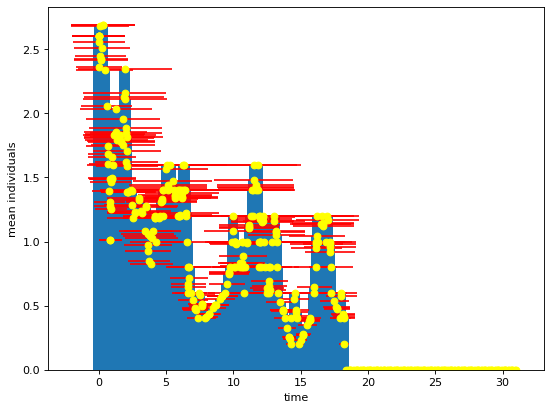

In [ ]:
from scipy.interpolate import interp1d
import numpy as np

#store the T_max of all the lists 
f=x+x1+x2+x3+x8
x_final=sorted(f) # sort the T_max values

# store the values of B
zfinal= z+z1+z2+z3+z8

#interpolate the values of B and T_max to solve nota bene problem
first=np.interp(x_final,x,z)
second=np.interp(x_final,x1,z1)
third=np.interp(x_final,x2,z2)
fourth=np.interp(x_final,x3,z3)
fifth=np.interp(x_final,x8,z8)

#store the mean and standard deviation of  B in at each point in time 

result=[np.mean([one,two,three,four,five]) for one,two,three,four,five in zip(first,second,third,fourth,fifth)]
result_ag=[np.std([one,two,three,four,five]) for one,two,three,four,five in zip(first,second,third,fourth,fifth)]

#plot the result and our standard deviation and error bar
figure(figsize=(8, 6), dpi=80)
#plt.plot(x_final, result)
plt.bar(x_final,result)
plt.errorbar(x_final,result,xerr=result_ag, fmt='o',ecolor = 'red',color='yellow')

plt.xlabel('time')
plt.ylabel('mean individuals')

plt.show()

# Second Scenario

# Large N while varrying R0 and B0

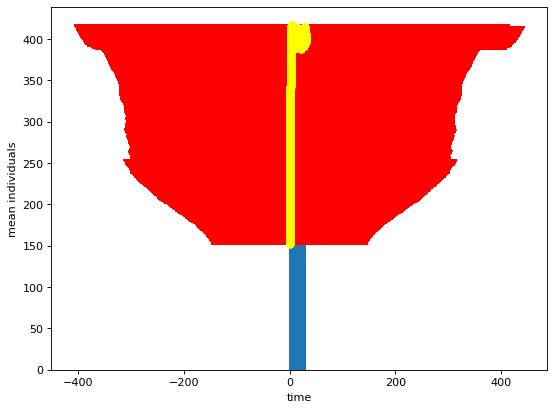

In [ ]:
from scipy.interpolate import interp1d
import numpy as np

#store the T_max of all the lists 
k=x4+x5+x6+x7
x_=sorted(k) # sort the T_max values

# store the values of B
z_final= z4+z5+z6+z7

#interpolate the values of B and T_max to solve nota bene problem
S_first=np.interp(x_,x4,z4)
S_second=np.interp(x_,x5,z5)
S_third=np.interp(x_,x6,z6)
S_fourth=np.interp(x_,x7,z7)


#store the mean and standard deviation of  B in at each point in time 

S_result=[np.mean([one,two,three,four]) for one,two,three,four in zip(S_first,S_second,S_third,S_fourth)]
S_result_ag=[np.std([one,two,three,four]) for one,two,three,four in zip(S_first,S_second,S_third,S_fourth)]

#plot the result and our standard deviation and error bar
figure(figsize=(8, 6), dpi=80)
#plt.plot(x_final, result)
plt.bar(x_,S_result)
plt.errorbar(x_,S_result,xerr=S_result_ag, fmt='o',ecolor = 'red',color='yellow')

plt.xlabel('time')
plt.ylabel('mean individuals') 

plt.show()


# Scenario 1

calculate the standard deviation and mean using mean field equation. 

first scenario is when N is small and varrying B0 and R0

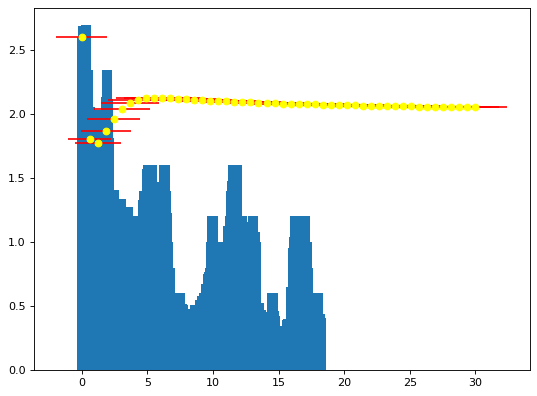

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(x,t,R,gamma,N):
    dxdt = R*gamma*x*(N-x)/N-gamma*x
    return dxdt

# initial condition

t = np.linspace(0,30)

Y1 = odeint(model,1,t,args=(0.5,1,10))
Y2 = odeint(model,5,t,args=(0.5,5,10))
Y3 = odeint(model,1,t,args=(2,1,10))
Y4 = odeint(model,5,t,args=(2,5,10))
Y5 = odeint(model,1,t,args=(1,1,10))

euler=[np.mean([one,two,three,four,five]) for one,two,three,four,five in zip(Y1,Y2,Y3,Y4,Y5)]
euler2=[np.std([one,two,three,four,five]) for one,two,three,four,five in zip(Y1,Y2,Y3,Y4,Y5)]

figure(figsize=(8, 6), dpi=80)
#plt.plot(x_final, result)
plt.bar(x_final,result)
plt.errorbar(t,euler,xerr=euler2, fmt='o',ecolor = 'red',color='yellow')

plt.show()

# Scenario 2

N is large while varrying R0 and B0

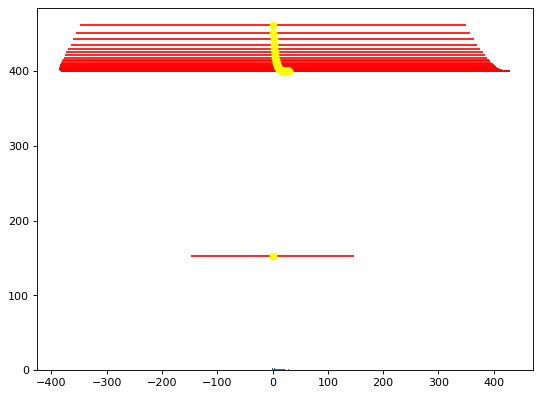

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(x,t,R,gamma,N):
    dxdt = R*gamma*x*(N-x)/N-gamma*x
    return dxdt

# initial condition

t = np.linspace(0,30)

Y1 = odeint(model,5,t,args=(0.5,5,1000))
Y2 = odeint(model,300,t,args=(0.5,0.5,1000))
Y3 = odeint(model,5,t,args=(5,5,1000))
Y4 = odeint(model,300,t,args=(5,5,1000))


euler=[np.mean([one,two,three,four]) for one,two,three,four in zip(Y1,Y2,Y3,Y4)]
euler2=[np.std([one,two,three,four]) for one,two,three,four in zip(Y1,Y2,Y3,Y4)]

figure(figsize=(8, 6), dpi=80)
#plt.plot(x_final, result)
plt.bar(x_final,result)
plt.errorbar(t,euler,xerr=euler2, fmt='o',ecolor = 'red',color='yellow')

plt.show()

# Analysis



> From the graphs of mean field equation and stochastich model, we can see that the models have a certain of agreement, the only reason why there seems to be a difference in standard deviation points is because, in schotastic there is more time data points than we used in the mean field equation. However, we can see that there is an agreement between both of the approaches. However, the agreement depends on the parameters.



> When our N and B0 are small, we can see that the two approaches looks alike, however, the bigger the number of our population and the intial population in B, the the less agreement there between the two graphs.



> The two graphs in each scenario of each approach dont look exactly the same but they have the same trend, the reason why that is happening, is because our stochastic algorithm simulate every transition of our system, meaning that for every tranjectory we are getting all the possible values for that trajectory based on the stochastic model, which explains the fact that we have more data points and more definition to the graphs in the stochastic approach.









compare the stochastic and mean field equation agreement when using 100 replications

Text(0, 0.5, 'individuals')

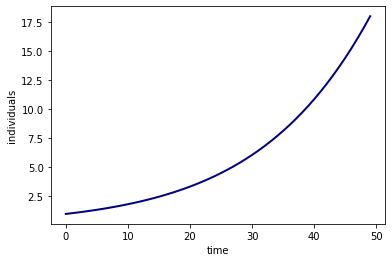

In [ ]:
from itertools import repeat
import numpy as np
from __future__ import division
def mean(a):
    return sum(a) / len(a)

YY=odeint(model,1,t,args=(1.2,0.5,1000)) #Euler integration using numpy

final = [sum(list(YY[i])) for i in range(50)]
Final_=list(repeat(final, 100))    # 100 replication of our results


res=list(map(mean, zip(*Final_))) #convert to a list of list for plotting

plt.plot(range(50),res,color='navy',linewidth=2) #plotting



plt.xlabel('time')
plt.ylabel('individuals')

Using the stochastic approach

Text(0, 0.5, 'individuals')

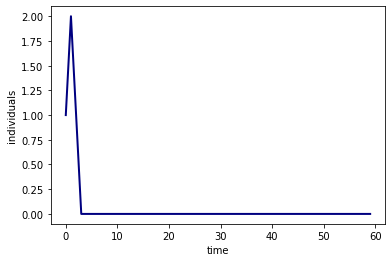

In [ ]:
xxx,yyy,zzz=gillespie_ABA(1000,1,0.51,0.5,30) # gellipse algorithm

repli=list(repeat(zzz, 100))   # 100 replication of our results

resi=list(map(mean, zip(*repli))) #convert to a list of list for plotting


plt.plot(range(len(resi)),resi,color='navy',linewidth=2) # plot the values

plt.xlabel('time')
plt.ylabel('individuals')

# Analysis

From this simple graph, we can conclude that for the given values of the first scenario, there is a big difference, on how the system behaves , while the stocastic converges to 0, the mean field approach converges to a certain upper bound, that is bigger than 0.


The fact that we considered a 100 replication of our scenario somehow increased the disagremment of the approaches, the reaason for that is the fact that the scale process of our gellipse algorithm is on individual level, which makes the values in much smaller since we are considering it on an individual level, unlike the mean field, so the more replication we do, the more disagreement we will get. However, we can overcome that, by changing the gellipse algorithm, to not operate on an indivdual level and rather on a large number of individuals.